In [1]:
#Imports
from ipynb.fs.full.data_integration import retrieve_ohlcv
from ipynb.fs.full.data_integration import retrieve_historical_data
from ipynb.fs.full.data_integration import retrieve_historical_data
import pandas as pd
from itertools import combinations_with_replacement
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

### OHLC approach

In [2]:
data = retrieve_ohlcv('BTC/USD')

print(f"Total length of dataset is {len(data)}")
print()
print(f"An example of the data acquired is: \n"
      f"\n"
      f"{data[0]}]")

Total length of dataset is 300

An example of the data acquired is: 

[1626989640000, 32276.68, 32279.0, 32275.65, 32279.0, 0.96913301]]


In [3]:
# Convert OHLC data to dataframe (use this to convert time col: https://www.epochconverter.com/)
data_df = pd.DataFrame(data)

data_df = data_df.rename(columns={0: "Time ms",
                                  1: "Open",
                                  2: "High",
                                  3: "Low",
                                  4: "Close",
                                  5: "Vol"})

data_df.tail()

,Time ms,Open,High,Low,Close,Vol
295,1627007340000,32611.18,32614.87,32605.2,32608.82,3.313212
296,1627007400000,32608.83,32608.83,32600.0,32600.87,2.587796
297,1627007460000,32600.00,32608.83,32600.0,32608.83,10.509223
298,1627007520000,32608.83,32608.83,32600.0,32602.01,2.067019
299,1627007580000,32602.00,32602.01,32585.0,32585.00,12.056466


### Historical data approach

In [4]:
date = '2013-01-01-00-00'

data = retrieve_historical_data('BTC-USD', date)#'2018-09-15-00-00')

Checking input parameters are in the correct format...
Formatting Dates...
Checking if ticker supplied is available on the CoinBase Pro API...
Connected to the CoinBase Pro API...
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction...
Data for chunk 0 of 10 extracted
CoinBase Pro API did not have any data available for 'BTC-USD' beginning at 2013-01-01-00-00. Trying a later date:'2013-01-01T00:00:00'
Data for chunk 1 of 10 extracted
CoinBase Pro API did not have any data available for 'BTC-USD' beginning at 2013-01-01-00-00. Trying a later date:'2013-10-28T00:00:00'
Data for chunk 2 of 10 extracted
CoinBase Pro API did not have any data available for 'BTC-USD' beginning at 2013-01-01-00-00. Trying a later date:'2014-08-24T00:00:00'
Data for chunk 3 of 10 extracted
Data for chunk 4 of 10 extracted
Data for chunk 5 of 10 extracted
Data for chunk 6 of 10 extracted
Data for chunk 7 of 10 extracted
Data for chunk 8 of 10 extracted
Data for chunk 9 of 10 extracted
Data f

In [21]:
# Crypto_df
data_df = data

data.shape

(2196, 5)

<AxesSubplot:xlabel='time'>

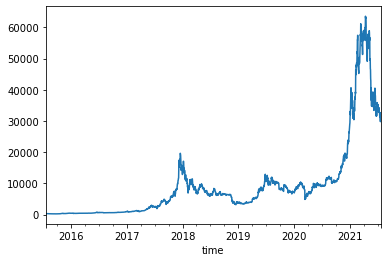

In [6]:
data_df['close'].plot()

### Time-series analysis

In [7]:
# Get all combinations of [1, 2, 3] and length 2
comb = combinations_with_replacement([1, 1, 3], 3)

variables_list = []

# Print the obtained combinations
for i in list(comb):
#     print(i)
#     print(i[1])
    if i[1] == 1:    
        
        variables_list.append(i)
    
print(variables_list)

[(1, 1, 1), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3)]


In [8]:
results_aic = []
results_bic = []

for combination in variables_list:
    model = ARIMA(data_df['close'], 
                  order=combination)
    
    results = model.fit()
    
    results_aic.append(results.aic)
    results_bic.append(results.bic)
    
df = pd.DataFrame({'aic':results_aic,
                   'bic':results_bic},
                  index=variables_list).sort_values(by='aic')

In [9]:
aic_df_sorted = df.sort_values(by=['aic'], ascending=False)

aic_df_sorted

,aic,bic
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 3)",34933.076702,34967.240326
"(1, 1, 3)",34933.076702,34967.240326
"(1, 1, 3)",34933.076702,34967.240326


In [10]:
bic_df_sorted = df.sort_values(by=['bic'], ascending=False)

bic_df_sorted

,aic,bic
"(1, 1, 3)",34933.076702,34967.240326
"(1, 1, 3)",34933.076702,34967.240326
"(1, 1, 3)",34933.076702,34967.240326
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972
"(1, 1, 1)",34939.846223,34962.621972


<AxesSubplot:>

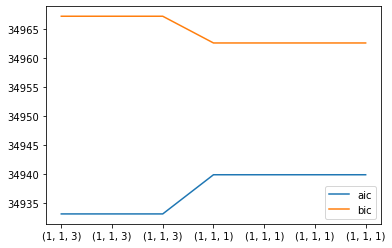

In [11]:
df.plot()

In [12]:
aic_df_sorted.index[0]

(1, 1, 1)

In [13]:
# Rerun ARIMA
model_refined = ARIMA(data_df['close'],
                      order=aic_df_sorted.index[0])

results_refined = model_refined.fit()

results_refined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 2195
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17465.923
Method:                       css-mle   S.D. of innovations            691.041
Date:                Fri, 23 Jul 2021   AIC                          34939.846
Time:                        12:34:31   BIC                          34962.622
Sample:                    07-21-2015   HQIC                         34948.170
                         - 07-23-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.7174     13.909      1.058      0.290     -12.544      41.979
ar.L1.D.close    -0.4084      0.183     -2.229      0.026      -0.768      -0.049
ma.L1.D.close     0.3281      0.189      1.733      0.083      -0.043       0.699
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4484           +0.0000j            2.4484            0.5000
MA.1           -3.0474           +0.0000j            3.0474            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures BTC Price'}>

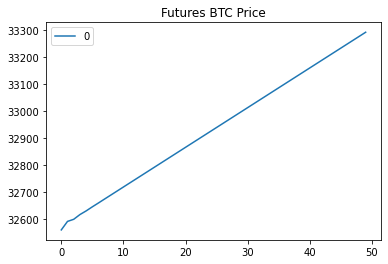

In [14]:
# Plot the Futures Price Forecast
pd.DataFrame(results_refined.forecast(steps=50)[0]).plot(title="Futures BTC Price")

<AxesSubplot:title={'center':'Futures BTC Price'}>

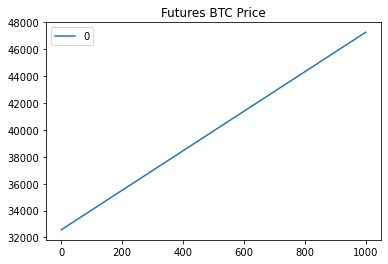

In [20]:
pd.DataFrame(results_refined.forecast(steps=1000)[0]).plot(title="Futures BTC Price")

In [44]:
data_df.shape

(2196, 5)

In [66]:
train = data_df.iloc[: 1900, 3]

test = data_df.iloc[1900 :, 3]


In [67]:
from datetime import datetime
datelist = pd.date_range(test.index[0], periods=200).tolist()
datelist[-1]

Timestamp('2021-04-18 00:00:00', freq='D')

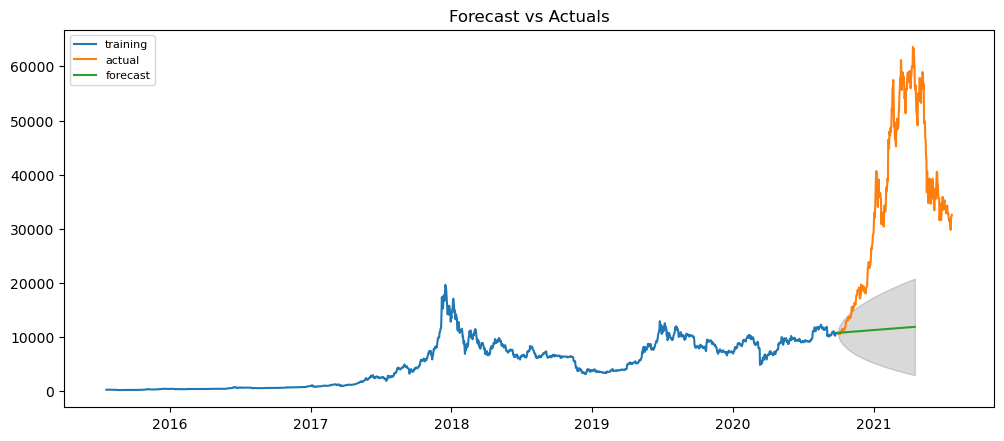

In [71]:

import matplotlib.pyplot as plt
%matplotlib inline
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(200, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=datelist)
lower_series = pd.Series(conf[:, 0], index=datelist)
upper_series = pd.Series(conf[:, 1], index=datelist)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#Use ARIMA to predict 2 days then add to model and move forward by 2days to account for increased CI with time
